In [1]:
# Import packages
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML

# Set default Seaborn style
sns.set()

In [2]:
# File path
food_business_file = 'Dataset/food_business.csv'

In [3]:
# Read in data as DataFrame
food_business = pd.read_csv(food_business_file)

In [4]:
# Overall info
display(food_business.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33289 entries, 0 to 33288
Data columns (total 10 columns):
business_id     33289 non-null object
name            33289 non-null object
attributes      32589 non-null object
city            33289 non-null object
state           33289 non-null object
categories      33289 non-null object
stars           33289 non-null float64
review_count    33289 non-null int64
postal_code     33199 non-null float64
population      33289 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.5+ MB


None

During story telling of the dataset, the scatter plot shows there is a slightly positive correlation between population and review count. To further comfirm it wasn't happened by chance, I apply bootstrap permuation test on the Pearson correlation coefficient of the two variables. The hypothesis is set as the following,<br>
$H_0$: There's no correlation between population and review count.<br>
$H_A$: There is a correlation between population and review count.

In [5]:
# Explore correlation between review counts and population
review_counts = food_business.loc[:, 'review_count']
population = food_business.loc[:, 'population']
# Compute Pearson correlation coefficient
pearson_r = np.corrcoef(review_counts, population)[0,1]
print('The Pearson correlation coefficient = %f' %pearson_r)

The Pearson correlation coefficient = 0.098716


In [6]:
# Initialize an array for replicates
perm_replicates = np.empty(10000)

# Generate replicates
for i in range(len(perm_replicates)):
    # Permute number of discharges
    review_counts_permuted = np.random.permutation(review_counts)
    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(review_counts_permuted, population)[0,1]

# Compute p-value
p = np.sum(perm_replicates > pearson_r)/len(perm_replicates)
print('p = %f' %p)

p = 0.000000


The p-value is small enough to reject the null hypothesis. It implies that there is a positive correlation between population and review count. The Pearson correlation didn't happen by chance.

Next, I test if stars, review count and population are normal. I use normaltest from Scipy stats package to perform the testing.

In [7]:
# Normal test on stars
stars = food_business.loc[:, 'stars']
stars_k2, stars_p = stats.normaltest(stars)
print('k2 = %f' % stars_k2)
print('p = {:g}'.format(stars_p))

k2 = 1219.070738
p = 1.91493e-265


In [8]:
# Normal test on review counts
review_k2, review_p = stats.normaltest(review_counts)
print('k2 = %f' % review_k2)
print('p = {:g}'.format(review_p))

k2 = 56377.990556
p = 0


In [9]:
# Normal test on population
population_k2, population_p = stats.normaltest(population)
print('k2 = %f' % population_k2)
print('p = {:g}'.format(population_p))

k2 = 6067.607592
p = 0


The results show that only review counts and population are normal.

Part of the design of this model is using different size group to predict if the food business is good. Thus, I split the dataset into five groups based on population and apply further exploration on them. 

In [10]:
# Split population to four groups 
first , second, third, fourth, fifth = np.percentile(population, [20,40,60,80,100])
first_group = food_business.loc[food_business.population <= first]
second_group = food_business.loc[(food_business.population > first) & (food_business.population <= second)]
third_group = food_business.loc[(food_business.population > second) & (food_business.population <= third)]
fourth_group = food_business.loc[(food_business.population > third) & (food_business.population <= fourth)]
fifth_group = food_business.loc[(food_business.population > fourth) & (food_business.population <= fifth)]
print('The population of first group is from %d to %d, with %d records' % (min(first_group.population), max(first_group.population), len(first_group)))
print('The population of second group is from %d to %d, with %d records' % (min(second_group.population), max(second_group.population), len(second_group)))
print('The population of third group is from %d to %d, with %d records' % (min(third_group.population), max(third_group.population), len(third_group)))
print('The population of fourth group is from %d to %d, with %d records' % (min(fourth_group.population), max(fourth_group.population), len(fourth_group)))
print('The population of fifth group is from %d to %d, with %d records' % (min(fifth_group.population), max(fifth_group.population), len(fifth_group)))

The population of first group is from 228 to 32297, with 6757 records
The population of second group is from 32349 to 249950, with 7668 records
The population of third group is from 253458 to 496401, with 6551 records
The population of fourth group is from 611648 to 641676, with 5966 records
The population of fifth group is from 859035 to 1626078, with 6347 records


In [11]:
# Get the mean of each group
first_review_mean = np.mean(first_group.review_count)
second_review_mean = np.mean(second_group.review_count)
third_review_mean = np.mean(third_group.review_count)
fourth_review_mean = np.mean(fourth_group.review_count)
fifth_review_mean = np.mean(fifth_group.review_count)
print('Review count mean for each group:')
print('First group is %f' % first_review_mean)
print('Second group is %f' % second_review_mean)
print('Third group is %f' % third_review_mean)
print('Fourth group is %f' % fourth_review_mean)
print('Fifth group is %f' % fifth_review_mean)

Review count mean for each group:
First group is 35.743525
Second group is 75.790558
Third group is 70.030072
Fourth group is 167.533691
Fifth group is 84.286435


In [12]:
# Get standard deviation of each group
first_review_std = np.std(first_group.review_count)
second_review_std = np.std(second_group.review_count)
third_review_std = np.std(third_group.review_count)
fourth_review_std = np.std(fourth_group.review_count)
fifth_review_std = np.std(fifth_group.review_count)
print('Review count standard deviation for each group:')
print('First group is %f' % first_review_std)
print('Second group is %f' % second_review_std)
print('Third group is %f' % third_review_std)
print('Fourth group is %f' % fourth_review_std)
print('Fifth group is %f' % fifth_review_std)

Review count standard deviation for each group:
First group is 58.358020
Second group is 134.881958
Third group is 118.092453
Fourth group is 376.340645
Fifth group is 156.474360


In [13]:
# Get median of each group
first_review_median = np.percentile(first_group.review_count, 50)
second_review_median = np.percentile(second_group.review_count, 50)
third_review_median = np.percentile(third_group.review_count, 50)
fourth_review_median = np.percentile(fourth_group.review_count, 50)
fifth_review_median = np.percentile(fifth_group.review_count, 50)
print('Review count median for each group:')
print('First group is %f' % first_review_median)
print('Second group is %f' % second_review_median)
print('Third group is %f' % third_review_median)
print('Fourth group is %f' % fourth_review_median)
print('Fifth group is %f' % fifth_review_median)

Review count median for each group:
First group is 16.000000
Second group is 28.000000
Third group is 27.000000
Fourth group is 47.000000
Fifth group is 29.000000


As we can see from the results above, the fourth group has higher number than the other four groups. There could be noise in the fourth group that cause this. I decided to do a ECDF graph on all five groups to explore their similarity. 

In [14]:
# Create ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)
    
    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

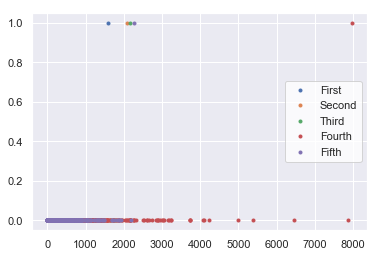

In [15]:
# Plot review count ECDF graphs for all five groups
first_x, first_y = ecdf(first_group['review_count'])
second_x, second_y = ecdf(second_group['review_count'])
third_x, third_y = ecdf(third_group['review_count'])
fourth_x, fourth_y = ecdf(fourth_group['review_count'])
fifth_x, fifth_y = ecdf(fifth_group['review_count'])

_ = plt.plot(first_x, first_y, marker='.', linestyle='none')
_ = plt.plot(second_x, second_y, marker='.', linestyle='none')
_ = plt.plot(third_x, third_y, marker='.', linestyle='none')
_ = plt.plot(fourth_x, fourth_y, marker='.', linestyle='none')
_ = plt.plot(fifth_x, fifth_y, marker='.', linestyle='none')
_ = plt.legend(('First','Second','Third','Fourth','Fifth'), loc='right', facecolor='white')

In [19]:
# Look into group four data
display(fourth_group.loc[fourth_group['review_count'] > fourth_review_mean].groupby('state').business_id.count())

state
NV    1454
Name: business_id, dtype: int64

In [21]:
display(fourth_group.loc[fourth_group['review_count'] > fourth_review_mean].groupby('city').business_id.count())

city
Las Vegas    1454
Name: business_id, dtype: int64

In [20]:
display(fourth_group.loc[fourth_group['review_count'] > fourth_review_mean].categories)

9        Beer, Wine & Spirits, Italian, Food, American ...
42       American (New), Restaurants, Food, Breweries, ...
44       Bars, American (Traditional), Nightlife, Resta...
59       Restaurants, Bars, Nightlife, Caterers, Mexica...
119                      Japanese, Sushi Bars, Restaurants
182                                   Mexican, Restaurants
246               Diners, Sandwiches, Restaurants, Burgers
248                  Lounges, Bars, Dance Clubs, Nightlife
275             Seafood, Restaurants, Mexican, Gluten-Free
317                                     Pizza, Restaurants
432                      Japanese, Sushi Bars, Restaurants
441                  Restaurants, Bars, Nightlife, Italian
605      Restaurants, Bars, Nightlife, American (New), ...
623      Breakfast & Brunch, Bars, Food, American (New)...
624      Event Planning & Services, Restaurants, Catere...
645      Restaurants, Desserts, Bakeries, Food, Sandwiches
675      Restaurants, Beer, Wine & Spirits, American (N.

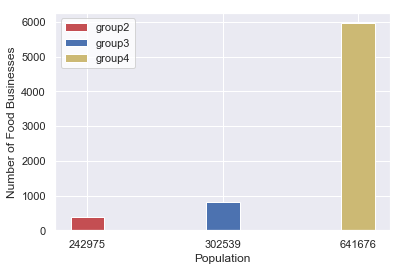

In [96]:
# Plot NV data from each group based on population
first_nv = first_group.loc[first_group['state'] == 'NV'].groupby('population').business_id.count()
second_nv = second_group.loc[second_group['state'] == 'NV'].groupby('population').business_id.count()
third_nv = third_group.loc[third_group['state'] == 'NV'].groupby('population').business_id.count()
fourth_nv = fourth_group.loc[fourth_group['state'] == 'NV'].groupby('population').business_id.count()
fifth_nv = fifth_group.loc[fifth_group['state'] == 'NV'].groupby('population').business_id.count()

# Set a variable to count how many in each group
total_cnt = 0
labels = []
position = 0

ax = plt.subplot(111)
if not first_nv.empty:
    ax.bar(position, first_nv, color='g', width=0.25, label='group1')
    total_cnt += len(first_nv)
    labels.append(first_nv.index[0])
    position += 1
if not second_nv.empty:
    ax.bar(position, second_nv, color='r', width=0.25, label='group2')
    total_cnt += len(second_nv)
    labels.append(second_nv.index[0])
    position += 1
if not third_nv.empty:
    ax.bar(position, third_nv, color='b', width=0.25, label='group3')
    total_cnt += len(third_nv)
    labels.append(third_nv.index[0])
    position += 1
if not fourth_nv.empty:
    ax.bar(position, fourth_nv, color='y', width=0.25, label='group4')
    total_cnt += len(fourth_nv)
    labels.append(fourth_nv.index[0])
    position += 1
if not fifth_nv.empty:
    ax.bar(position, fifth_nv, color='purple', width=0.25, label='group5')
    total_cnt += len(fifth_nv)
    labels.append(fifth_nv.index[0])
    position += 1

_ = plt.xticks(np.arange(total_cnt), labels)
_ = plt.xlabel('Population')
_ = plt.ylabel('Number of Food Businesses')
plt.legend(facecolor='w')
plt.show()

In [97]:
# Find all cities in NV in the dataset
display(food_business.loc[food_business['state'] == 'NV'].groupby('city').groups.keys())

['North Las Vegas', 'Las Vegas', 'Henderson']